# <span class="bg-primary">20. EXPLORER DONNEES ALGO NON SUPERVISES</span>

# <span class="bg-info">TP - ACP JEU DONNEES PERFORMANCES ATHLETES </span>

In [3]:
# ACP = Analyse en composante principales

In [4]:
import pandas as pd

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
# Chargement des données
data = pd.read_csv('decathlon.txt', sep="\t")

In [8]:
data.head()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar


In [14]:
# éliminer les colonnes que nous n'utiliserons pas : les performances au 
# décathlon
my_data = data.drop(['Points', 'Rank', 'Competition'], axis=1)

In [12]:
# transformer les données en array numpy
X = my_data.values
print(X.shape)

(41, 10)


In [15]:
# les données n'ont pas les mêmes échelles : temps de parcours en seconde
# on des longueurs en m ==> il faut normaliser les données
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# <span class="bg-warning">CALCUL DES COMPOSANTES PRINCIPALES</span>

In [16]:
from sklearn import decomposition

# commence par 2 composantes au hasard
pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

# <span class="bg-warning">POURCENTAGE DE VARIANCE EXPLIQUEE</span>

In [18]:
print(pca.explained_variance_ratio_)
# premier composante explique 32.7% et la deuxième 17.37%
print(pca.explained_variance_ratio_.sum())
# pourcentage de variance qu'explique les 2 variables ensembles 50,1%
print(pca.explained_variance_ratio_.cumsum())
# variance cumulée

[0.32719055 0.1737131 ]
0.5009036561090068
[0.32719055 0.50090366]


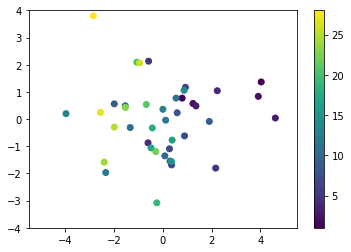

In [19]:
# Visualisation es 41 points dans le nouvel espace en 2 dimensions en 
# projettant les données initiales sur ces 2 axes

# projeter X sur les composantes principales
X_projected = pca.transform(X_scaled)

# afficher chaque observation
plt.scatter(X_projected[:, 0], X_projected[:, 1],
    # colorer en utilisant la variable 'Rank'
    c=data.get('Rank'))

plt.xlim([-5.5, 5.5])
plt.ylim([-4, 4])
plt.colorbar()
# chaque point est un athlète représenté en 2 dimensions

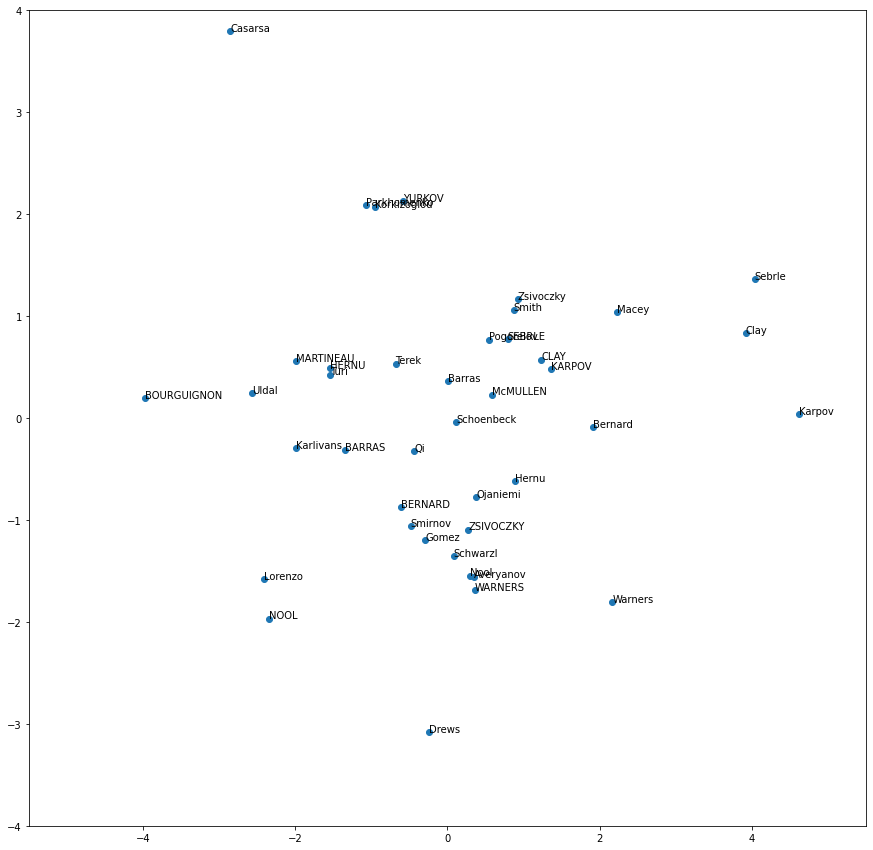

In [30]:
# avec affichage du nom des athlètes qui est dans l'index de la ligne

# Visualisation es 41 points dans le nouvel espace en 2 dimensions en 
# projettant les données initiales sur ces 2 axes

# projeter X sur les composantes principales
X_projected = pca.transform(X_scaled)

fig = plt.figure(figsize=(15, 15))
# afficher chaque observation
plt.scatter(X_projected[:, 0], X_projected[:, 1])

for i, (x, y) in enumerate(zip(X_projected[:, 0], X_projected[: , 1])):
    plt.text(x, y, data.index[i])
    
plt.xlim([-5.5, 5.5])
plt.ylim([-4, 4])
plt.show()
# chaque point est un athlète représenté en 2 dimensions
# athlète très différents : Casara, Drews, Karpov...
# des athlètes très proches : Zsivosky, Smith
# athlètes relativement bons partout : Karpov (petit nombre) et 
# les moyens partout : bourguignons dans toutes les disciplines

# <span class="bg-warning">CONTRIBUTION DE CHAQUE VARIABLES AUX COMPOSANTES PRINCIPALES</span>

Text(0, 0.5, 'PC2')

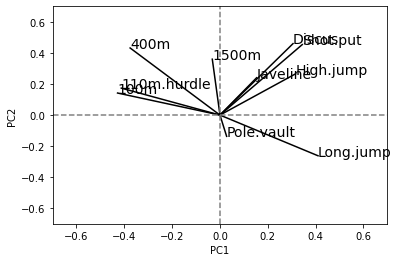

In [28]:
pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, data.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

plt.xlabel('PC1')
plt.ylabel('PC2')
# Diskus et shotput poids contribuent de la même façon aux 2 composantes 
# principales 
# idem 100m 100m haie aux représentations des athlètes
# les variables qui ont une contribution négative à la première composante 
# principale sont celles pour laquelle une bonne performance est représentée
# par un petit nombre : courses 100m, 100m haie, 400 m et 1500m.
# la deuxième composante principale : permet de séparer les athlètes qui sont 
# plutôt forts en lancer des athlètes qui sont plutôt forts en saut

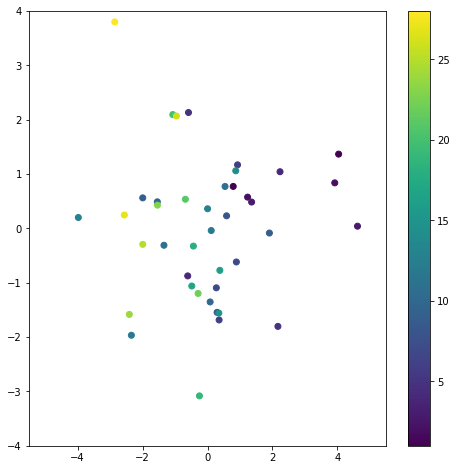

In [32]:
# on peut colorer chaque athlète en fonction de son classement final
fig = plt.figure(figsize=(8, 8))
# afficher chaque observation
plt.scatter(X_projected[:, 0], X_projected[:, 1],
    # colorer en utilisant la variable 'Rank'
    c=data.get('Rank'))
    
plt.xlim([-5.5, 5.5])
plt.ylim([-4, 4])
plt.colorbar() # légende des couleurs
plt.show()
# athlètes avec une bonne performance en violet (rang faible) à droite donc
# première composante positive et faible à droite 1ère comp négative


# <span class="bg-info">QUIZ 1</span>

In [65]:
from sklearn import decomposition

X_quiz1= pd.DataFrame([[0,0],
                        [0.5,0.5],
                        [1, 1],
                        [1.5, 1.5],
                        [2, 2],
                        [2.5, 2.5],
                        [3, 3]
                      ])
# commence par 2 composantes au hasard
pca_quiz1 = decomposition.PCA(n_components=2)
pca_quiz1.fit(X_quiz1)

PCA(n_components=2)

In [67]:
# projeter X sur les composantes principales
X_proj_quiz1 = pca_quiz1.transform(X_quiz1)
pcs_quiz1 = pca_quiz1.components_
pcs_quiz1

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [ ]:
import numpy as np 
X = np.array([[0, 0], [1, 1], [2, 2], [3, 3], [0.5, 0.5], [1.5, 1.5], [2.5, 2.5]])
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
pca.fit(X)
print pca.components_

# <span class="bg-info">QUIZ 2</span>

In [77]:
from sklearn import decomposition

X_quiz2= np.array([[1,1],
                   [3,1],
                   [1,2],
                   [2,0]
                  ])
X_quiz2.shape
# # commence par 2 composantes au hasard
pca_quiz2 = decomposition.PCA(n_components=2)
pca_quiz2.fit(X_quiz2)
X_quiz2

array([[1, 1],
       [3, 1],
       [1, 2],
       [2, 0]])

In [78]:
# projeter X sur les composantes principales
X_proj_quiz2 = pca_quiz2.transform(X_quiz2)
pcs_quiz2 = pca_quiz2.components_
pcs_quiz2

array([[-0.82192562,  0.56959484],
       [ 0.56959484,  0.82192562]])

In [72]:
from sklearn.decomposition import PCA

data = array([ [1,3,1,2], [1,1,2,0] ]).T

pca = PCA(n_components=2)
pca.fit(data)
data

array([[1, 1],
       [3, 1],
       [1, 2],
       [2, 0]])

# <span class="bg-info">REDUCTION DIMENSIONNELLE NON LINEAIRE</span>

In [4]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

In [7]:
def f(x):
    return x * np.cos(x) + np.random.normal(size=500)*2

# génération des points et création subset
x = np.linspace(0, 10, 500)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:])
y = f(x)

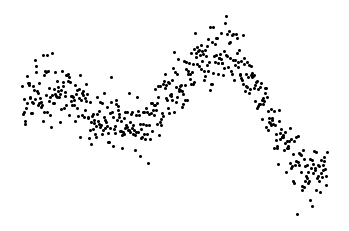

In [9]:
# create matrix versions of these arrays
plt.plot(x, y, 'o', color='black', markersize=2)
plt.axis('off')
plt.show()

In [ ]:
# effectuer une régression non linéaire sur ce jeu de données

In [ ]:
# manière explicite : expliquer la non-linéarité à travers des features, des 
# variables et d'augmenter la dimension de notre dataset avec ces nouvelles
# features, ce qui va en quelque sorte annuler ce comportement non linéaire 
# quand on va devoir le traiter avec des méthodes de classification ou de 
# régression ici.

In [15]:
x_a = np.array([x, x**2, x**3, x**4, x**5])
x_a.shape

(5, 500)

In [11]:
# augmentation du dataset avec ce qui nous semble représenter la non-linéarité
# dans notre problème. Comportement polynomiale donc pour ça on va augmenter
# le dataset avec des features polynomiales
x_augmented = np.array([x, x**2, x**3, x**4, x**5]).T
# np.array et on transpose pour mettre en colonne
x_augmented.shape

(500, 5)

In [17]:
# création régression linéaire
regr = linear_model.LinearRegression()
# entrainement sur le dataset augmenté
regr.fit(x_augmented, y)

LinearRegression()

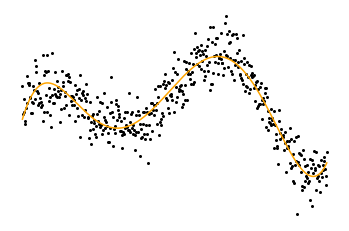

In [18]:
# visalisation
plt.plot(x_augmented[:,0], y, 'o', color='black', markersize=2)
plt.plot(x_augmented[:,0], regr.predict(x_augmented), '-', color='orange')
plt.axis('off')
plt.show()

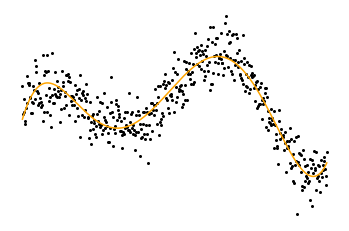

In [20]:
# visalisation
plt.plot(x, y, 'o', color='black', markersize=2)
plt.plot(x, regr.predict(x_augmented), '-', color='orange')
plt.axis('off')
plt.show()

# <span class="bg-info">Exemple t-SNE sur ensemble de visages</span>

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\PC Maison\scikit_learn_data


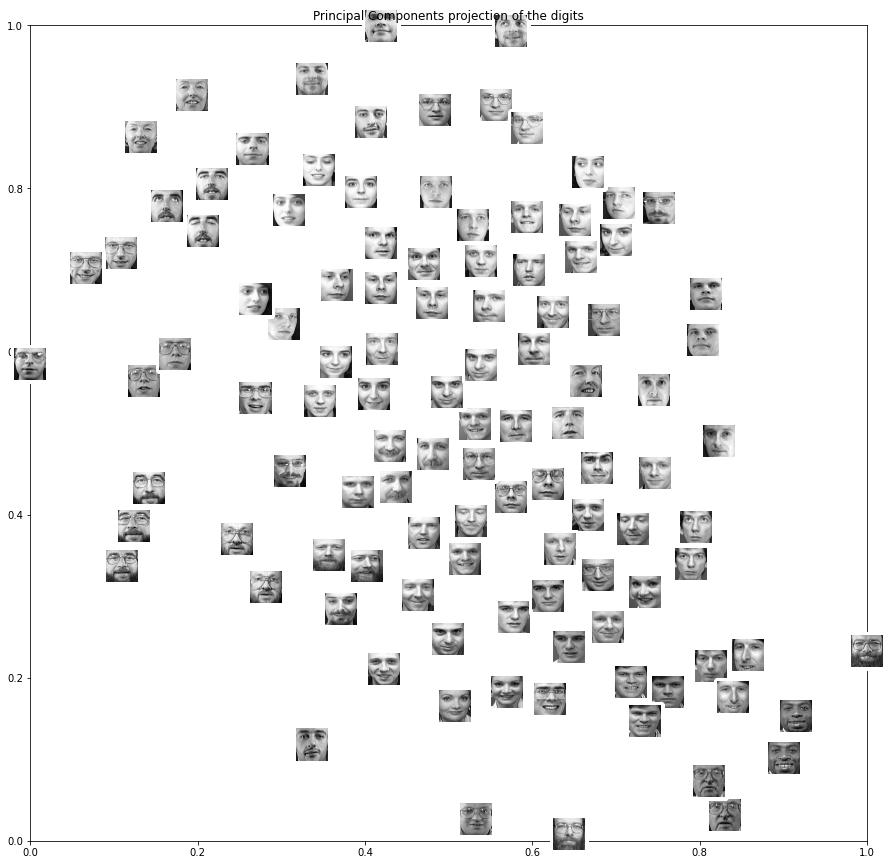

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn import (manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection)
from matplotlib import offsetbox

olivetti = fetch_olivetti_faces()
targets = olivetti.target
data = olivetti.data
images = olivetti.images

# fonction pour afficher une partie des images sur la visualisation 2D
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(15, 15))
    ax = plt.subplot(111)

    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1., 1.]])
        for i in range(data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 2e-3:
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            props={ 'boxstyle':'round', 'edgecolor':'white'}
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap=plt.cm.gray, zoom=0.5), X[i], bboxprops=props)
            ax.add_artist(imagebox)
    if title is not None:
        plt.title(title)
        
        
X = data
tsne = manifold.TSNE(n_components=2, perplexity=40, n_iter=3000, init='pca')
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, "Principal Components projection of the digits")
plt.show()

# <span class="bg-info">CLUSTERING K-means</span>

In [ ]:
# ex : graines de blé 210 grains de blé de 3 espèces différentes
#  avec 7 différentes variables, target = espèce du blé

In [23]:
import pandas as pd

In [26]:
data = pd.read_csv('seeds.txt', delim_whitespace=True, header=None)
data.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [28]:
# Features
X = data.drop(7, axis=1).values

In [30]:
# TARGET
y = data[7].values
print('X dim :',X.shape)
print('y dim :',y.shape)

X dim : (210, 7)
y dim : (210,)


In [31]:
# normalisation des données pour quelles prennent toutes la même importance
from sklearn import preprocessing
X_norm = preprocessing.scale(X)
print('X_norm dim :', X_norm.shape)

X_norm dim : (210, 7)


In [33]:
# création clustering K-means pour plusieurs tailles de clusters
# pour chaque taille de cluster, on calcule le coef de silhouette
# pour choisir la valeur de la plus grande ==> taille du cluster la plus
# appropriée
%pylab inline
from sklearn import cluster, metrics

silhouette = []
for num_clusters in range(2, 10):
    cls = cluster.KMeans(n_clusters=num_clusters, n_init=1, init='random')
    cls.fit(X_norm)
    silh = metrics.silhouette_score(X_norm, cls.labels_)
    silhouette.append(silh)

Populating the interactive namespace from numpy and matplotlib


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


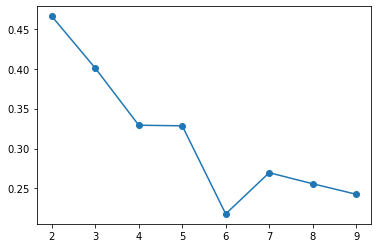

In [37]:
# visualisation de la silhouette en fonction du nombre de clusters
plt.plot(range(2, 10), silhouette, marker='o')
plt.show()
# la silhouette décroit en fonction du nombre de clusters ==> il faut 
# privilégier 2 ou 3 clusters

In [38]:
# pour regarder à quoi ressemblent les clusters, on va utiliser une ACP
# pour projeter les données sur 3 dimensions
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X_norm)
print(pca.explained_variance_ratio_.cumsum())
X_trans = pca.transform(X_norm)
# la première composante explique 72% de la variance et avec la deuxième 89%
# par les 2 composantes, ce n'est pas absurde d'utiliser ces 2 composantes
# pour représenter les données.

[0.71874303 0.88982486]


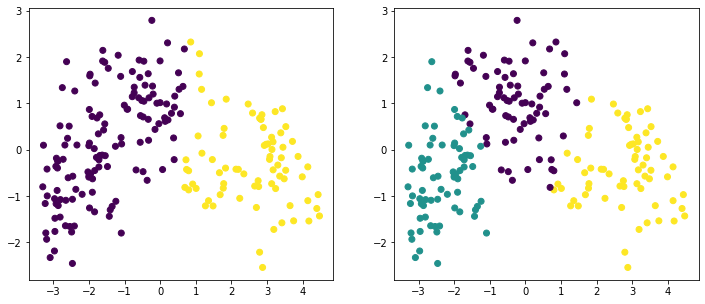

In [41]:
# on va afficher les données projetées sur ces 2 dimensions, colorées selon 
# le cluster auquel elles appartiennent pour 2 et 3 clusters
fig = plt.figure(figsize=(12,5))

# POUR 2 CLUSTERS
cls = cluster.KMeans(n_clusters=2)
cls.fit(X_norm)
# affichage côte à côte des 2 figures clusters 2 et 3
ax = fig.add_subplot(121)
# X_trans données projetées sur première composante puis deuxième coloré en 
# fonction des labels donnés par le clustering cls
ax.scatter(X_trans[:, 0], X_trans[:, 1], c=cls.labels_)

# POUR 3 CLUSTERS
cls3 = cluster.KMeans(n_clusters=3)
cls3.fit(X_norm)
# affichage côte à côte des 2 figures clusters 2 et 3
ax = fig.add_subplot(122)
# X_trans données projetées sur première composante puis deuxième coloré en 
# fonction des labels donnés par le clustering cls
ax.scatter(X_trans[:, 0], X_trans[:, 1], c=cls3.labels_)

plt.show()

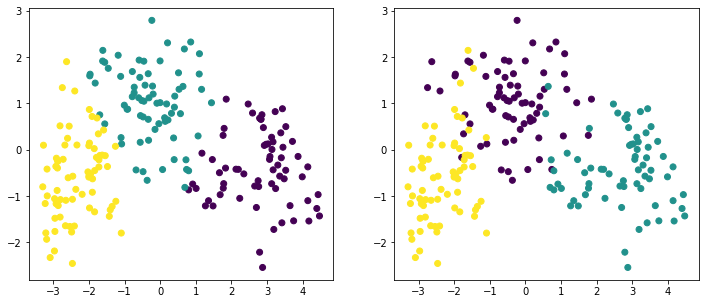

In [43]:
# comparer le clustering en 3 groupes avec les étiquettes y des 3 familles de 
# blé

fig = plt.figure(figsize=(12,5))

# AFFICHAGE des 3 CLUSTERS
cls3 = cluster.KMeans(n_clusters=3)
cls3.fit(X_norm)
# affichage côte à côte des 2 figures clusters 2 et 3
ax1 = fig.add_subplot(121)
# X_trans données projetées sur première composante puis deuxième coloré en 
# fonction des labels donnés par le clustering cls
ax1.scatter(X_trans[:, 0], X_trans[:, 1], c=cls3.labels_)


# AFFICHAGE DES DONNEES AVEC LEURS ETIQUETTES colorées
# affichage côte à côte des 2 figures clusters 2 et 3
ax1 = fig.add_subplot(122)
# X_trans données projetées sur première composante puis deuxième coloré en 
# fonction des étiquettes de départ y
ax1.scatter(X_trans[:, 0], X_trans[:, 1], c=y)

plt.show()

In [45]:
# comparaison de la justesse des 2 plots du cluster et des étiquettes
# score entre les étiquettes réelles y et les labels du clustering Kmeans
print(metrics.adjusted_rand_score(y, cls3.labels_))
# plus la valeur est proche de 1 plus les labels du clustering correspondnet
# aux étiquettes réelles initiales

0.7732937360806309


# <span class="bg-info">clustering hiérarchique</span>

In [ ]:
# ../..
# cluster.AgglomerativeClustering(linkage='average', n_clusters=3)
# ../..

# <span class="bg-info">TP CLUSTERING</span>

In [46]:
# répertoire de téléchargement
custom_data_home = 'C:/Users/PC Maison/7-OPENCLASSROOM/OC-COURS-20-EXPLORER_DONNEES_ALGO_NON_SUPERVISES/'

In [72]:
# Load data from https://www.openml.org/d/554
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
# X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [73]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [75]:
# Les données MNIST sont assez lourdes (70000 images). 
# Pour cette activité, vous pouvez travailler avec une fraction du jeu de 
# données : une image sur 50.
X = mnist.data[::50, :]
X.shape

(1400, 784)

In [76]:
y = mnist.target[::50]
y.shape

(1400,)

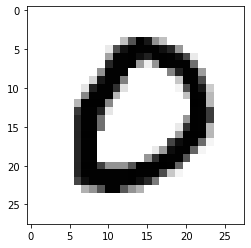

In [78]:
# Chaque observation de ce jeu de données est une image de 28 pixels par 28 
# pixels, dont l’étiquette y[i] est le chiffre qu’elle représente, et les 784 
# features le niveau de gris (entre 0 et 255) du pixel correspondant 
# (car 28 x 28 = 784). Pour visualiser une de ces images, par exemple celle 
# d’index 42, vous pouvez utiliser le code suivant :
sample_idx = 42
sample_image = np.reshape(X[sample_idx, :], (28, 28))
plt.imshow(sample_image, cmap='binary')
plt.show()

# 1. d’effectuer un partitionnement de X en 10 clusters, avec l’algorithme de clustering de votre choix

In [80]:
# 1. Choisissons le clustering avec kmeans 
from sklearn import cluster
myclust = cluster.KMeans(n_clusters=10)
myclust.fit(X)

KMeans(n_clusters=10)

# 2. de visualiser le résultat de ce clustering en deux dimensions (obtenues par exemple grâce à tSNE, après scaling des données)

In [81]:
# 2. Visualisation
# On commence par réduire la dimension des données avec tSNE. On scale d’abord les données :
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [82]:
# Puis on applique tSNE aux données scalées :
from sklearn import manifold
tsne = manifold.TSNE(n_components=2, init='pca')
X_trans = tsne.fit_transform(X_scaled)

In [84]:
type(y[0])

str

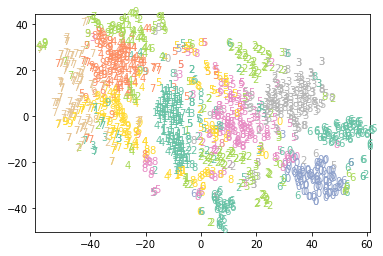

In [88]:
# Puis on visualise, selon la méthode donnée dans le coup de pouce :
from matplotlib import pyplot as plt # Dans Jupyter : % pylab inline
plt.figure()
for i in range(X.shape[0]): # pour chaque point
    # plt.text(X_trans[i, 0], X_trans[i, 1], str('%d' % y[i]),
    plt.text(X_trans[i, 0], X_trans[i, 1], y[i],             
            color=plt.cm.Set2(myclust.labels_[i]/10.))
# On redéfinit les axes pour bien voir tous les points
plt.xlim([np.min(X_trans[:, 0]), np.max(X_trans[:, 0])])
plt.ylim([np.min(X_trans[:, 1]), np.max(X_trans[:, 1])])

# On affiche l'image
plt.show()

# 3. d’évaluer la qualité de ce partitionnement, d’une part intrinsèquement (sans utiliser y) et d’autre part en le comparant aux chiffres représentés par les images (en utilisant y).

In [89]:
# 3. Évaluation
# Pour l’évaluation intrinsèque, je choisis le coefficient de silhouette :
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, myclust.labels_))

Silhouette Coefficient: 0.062


In [90]:
# Pour la comparaison aux étiquettes, je choisis l’indice de Rand ajusté :
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, myclust.labels_))

Adjusted Rand Index: 0.388
